# Introduction

This notebook provides examples of some machine learning methods used in supervised learning. Please refer to the table below to navigate through the notebook.

## Table of Content
0. [Supervised Learning](#supervised)
1. [Libraries](#libraries)
2. [Dataset](#dataset)
1. [KNN](#knn)
2. [SVM](#svm)
3. [Decision Trees](#decision-trees)
4. [Random Forest](#random-forest)
5. [Boosted Trees](#boosted-trees)

# 0. Supervised Learning <a name="supervised"></a>

Supervised learning is the machine learning task of learning a function that maps an input to an output based on example input-output pairs [1]. It infers a function from labelled training data consisting of a set of training examples [2].

![ML](ml2.png)
![ML](ml1.png)

Sources:
- [Wikipedia](https://en.wikipedia.org/wiki/Supervised_learning#:~:text=Supervised%20learning%20is%20the%20machine,a%20set%20of%20training%20examples.)
-  1. Stuart J. Russell, Peter Norvig (2010) Artificial Intelligence: A Modern Approach, Third Edition, Prentice Hall ISBN 9780136042594.
-  2. Mehryar Mohri, Afshin Rostamizadeh, Ameet Talwalkar (2012) Foundations of Machine Learning, The MIT Press ISBN 9780262018258.

## 1. Importing libraries <a name="libraries"></a>

In [1]:
#Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#Classifiers
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
# Preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Data visualisation
import seaborn as sns
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

%matplotlib inline
# Hide all warnings
import warnings
warnings.filterwarnings('ignore') # warnings.filterwarnings(action='once')

## 2. Dataset <a name="dataset"></a>

**Note:** download data from https://drive.google.com/drive/folders/1EgDN57LDuvlZAwr5-eHWB5CTJ7K9HpDP

Credit to this repo: https://github.com/LukasMosser/geolink_dataset

## Data Disclaimer

All the data serving as an input to these notebooks was generously donated by GEOLINK  
and is CC-by-SA 4.0 

If you use this data please reference the dataset properly to give them credit for their contribution.


## Data Preparation
The geolink dataset we will use in this notebook has been preprocessed. You can find the process of preparation of this dataset in <code>notebook/00 Data Prep/00-mc-prep_geolink_norge_dataset.ipynb</code>

## Load Dataset

In [2]:
interim_locations = Path("../../data/processed/geolink_norge_dataset/")
# Load processed dataset
geolink = pd.read_parquet(interim_locations/'geolink_norge_well_logs_train.parquet').set_index(['Well', 'DEPT'])
geolink

LITHOLOGY_GEOLINK       CALI      RHOB         GR  \
Well    DEPT                                                            
15_9-12 2215.917725        Shaly Silt  14.438001  2.363000  60.285748   
        2216.070068        Shaly Silt  14.633000  2.340000  63.250000   
        2216.222412        Shaly Silt  14.813001  2.314000  61.405998   
        2216.375000        Shaly Silt  14.383001  2.293000  62.561596   
        2216.527344        Shaly Silt  14.202999  2.275000  61.691055   
...                               ...        ...       ...        ...   
7_3-1   4569.153320  Cross Bedded Sst   8.538000  2.643616  50.886002   
        4569.305664  Cross Bedded Sst   8.540000  2.631049  51.219002   
        4569.458008  Cross Bedded Sst   8.548000  2.626054  51.671001   
        4569.610352  Cross Bedded Sst   8.552000  2.624065  51.820999   
        4569.762695  Cross Bedded Sst   8.546000  2.636137  51.327999   

                            DTC      RDEP      RMED  
Well    DEPT                                         
15_9-12 2215.917725  134.253601  0.737006  0.785088  
        2216.070068  129.101868  0.741000  0.840000  
        2216.222412  122.476944  0.752000  0.858000  
        2216.375000  116.908607  0.739962  0.857046  
        2216.527344  115.390953  0.715966  0.886082  
...                         ...       ...       ...  
7_3-1   4569.153320   63.442799  6.727000  6.835000  
        4569.305664   63.450794  6.639000  6.690000  
        4569.458008   63.590557  6.551000  6.520000  
        4569.610352   64.036644  6.464000  6.462185  
        4569.762695   64.322495  6.423000  6.439074  

[1192269 rows x 7 columns]

In [3]:
# we only take the data from CALI for X. 
X = geolink.iloc[:, 1:]
# LITHOLOGY_GEOLINK will be our class y. 
y = geolink['LITHOLOGY_GEOLINK']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2020)

## 3. K-Nearest Neighbors (KNN) <a name="knn"></a>
**Example of decision boundaries using KNN:**
<br/>
<div>
    Original Dataset. The dataset which consists of three classes (red,green and blue points). (For KNN classification example.)
<img src="https://upload.wikimedia.org/wikipedia/commons/c/cc/Data3classes.png" width=300 height=300/>
    Decision Boundaries using 1NN algorithm
<img src="https://upload.wikimedia.org/wikipedia/commons/5/52/Map1NN.png" width=300 height=300/>
</div>

Images sources: [Wikipedia](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm#/media/File:Data3classes.png)
 distributed under [CC BY-SA 3.0](https://creativecommons.org/licenses/by-sa/3.0/) license.
          
The code presented in this section is inspired from the official documentation [here](https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py).

According to Wikipedia:
>k-NN is a type of instance-based learning, or lazy learning, where the function is only approximated locally and all computation is deferred until function evaluation. Since this algorithm relies on distance for classification, normalizing the training data can improve its accuracy dramatically.

In [5]:
# Get types of Lithology
classes = list(geolink['LITHOLOGY_GEOLINK'].unique())
print(f'Classes: {classes}')
print(f'Total Classes: {len(classes)}')

Classes: ['Shaly Silt', 'Silt', 'Cinerite', 'Sandy Silt', 'Calcareous Cement', 'Silty Sand', 'Sandstone', 'Marlstone', 'Argillaceous Limestone', 'Limestone', 'Silty Shale', 'Coal', 'Cross Bedded Sst', 'Chalk', 'Porous Limestone', 'Gap', 'Dolomite', 'Anhydrite', 'Conglomerate', 'Halite', 'Carnallite']
Total Classes: 21


In [6]:
# Let's check the classes
y_train.to_numpy()

array(['Cross Bedded Sst', 'Silt', 'Shaly Silt', ..., 'Porous Limestone',
       'Shaly Silt', 'Shaly Silt'], dtype=object)

There a total of 21 classes. However, like in the majority of machine learning algorithms, it is recommended to encode target values.


There are different encoder preprocessing functions available in the scikit learn library. For this example we will use the [<code>LabelEncoder</code>](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html):

> Encode target labels with a value between 0 and n_classes-1. This transformer should be used to encode target values, i.e. y, and not the input X.

In [7]:
# Label Encoder
le = preprocessing.LabelEncoder()
# This will help the LabelEncoder to map the classes to a corresponding value between 0 and n_classes-1
le.fit(classes)

LabelEncoder()

The number of `neighbors` is a hyperparameter that must be set for this algorithm. We will arbitrarily select a value of 15 for this hyperparameter.

> In machine learning, a hyperparameter is a parameter whose value is used to control the learning process. By contrast, the values of other parameters (typically node weights) are derived via training.

Source: [Wikipedia](https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)#:~:text=In%20machine%20learning%2C%20a%20hyperparameter,weights%20are%20derived%20via%20training.)

In [8]:
# Number of Neighbors around our datapoint to be classified
n_neighbors = 15
knn_classifier = KNeighborsClassifier(n_neighbors)
# Now we will use the y values and transform the labels.
transformed_y_train = le.transform(y_train.to_numpy())
print(transformed_y_train)
# Let's fit the data
knn_classifier.fit(X_train, transformed_y_train)

[ 8 18 17 ... 14 17 17]


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [9]:
# Evaluation Time
y_pred = knn_classifier.predict(X_test)
y_true = le.transform(y_test.to_numpy())
print(f'Accuracy: {accuracy_score(y_true, y_pred)}')

Accuracy: 0.5908225485837939


We were able to predict the 21 different classes with 59% accuracy using new data. This is slightly better than random, however the accuracy is still very low. Let's train using the same algorithm and hyperparameters but this time we will normalise the data.

## Normalised Data

So we talked about normalisation before, but let's remember what is the concept about:

### Why normalise the data?

Many machine learning (ML) algorithms attempt to find trends in the data by comparing the features of data points. However, machine learning algorithms usually struggle more in the training phase when the features are on different scales. Normalise the data will almost always improve the results for ML algorithms.

There are different ways to normalised the data and usually, each method has pros and cons. For example, some methods are better at dealing with outliers than others.

Two of the most popular methods for normalising the data are:

* Standard Score:
$\frac {X-\mu }{\sigma }$

* Min-Max Feature Scaling:
$X'={\frac {X-X_{\min }}{X_{\max }-X_{\min }}}$

More information about normalisation [here](https://en.wikipedia.org/wiki/Normalization_(statistics))

In [10]:
# Let's use Standard Score for this example
normalized_df = (X-X.mean())/X.std()

In [11]:
# These are the original max values of the dataset
X.max()

CALI       25.726528
RHOB        7.274863
GR       1469.987427
DTC       382.908081
RDEP    36832.062500
RMED    46629.203125
dtype: float64

In [12]:
# These are the original max values after normalising
normalized_df.max()

CALI      4.108212
RHOB     25.280707
GR       40.737775
DTC      10.199811
RDEP    135.840999
RMED    326.220495
dtype: float64

In [13]:
# Let's used the normalized data for both for training and testing
X_train, X_test, y_train, y_test = train_test_split(normalized_df, y.to_numpy(), test_size=0.2, random_state=2020)

In [14]:
# Label Encoder
le = preprocessing.LabelEncoder()
# This will help the LabelEncoder to map the classes to a corresponding value between 0 and n_classes-1
le.fit(y.to_numpy())

LabelEncoder()

In [15]:
# Normalized knn
knn_classifier_norm = KNeighborsClassifier(n_neighbors)
# Now we will use the y values and transform the labels.
transformed_y_train = le.transform(y_train)
# Let's fit the data
knn_classifier_norm.fit(X_train, transformed_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [16]:
# Evaluation Time
y_pred = knn_classifier_norm.predict(X_test)
y_true = le.transform(y_test)
print(f'Accuracy: {accuracy_score(y_true, y_pred)}')

Accuracy: 0.6474624036501799


So now we got an accuracy of 64%. That's an improvement of 5% accuracy in the model just by normalising the data. Normalising will usually help in the training process. So it's a good practice to preprocess the data before the training phase.

#### So... What if we change the hyperparameters of a classifier such as the number of `neighbors`?

We can see in the examples below how changing <code>n_neighbors</code> affect the performance of the final model.

The accuracy for the same normalised model are:

- n_neighbors = 10, accuracy: 65.26%
- n_neighbors = 5,  accuracy: 65.5%
- n_neighbors = 1,  accuracy: 63.85%

We could  manually try different values until we find the best hyperparameters. Of course, this approach could be very time consuming, in particular, when we have a big feature space and want to optimise many hyperparameters. One way to solve this problem is automating the search of hyperparameters. This is also called Hyperparameter Optimisation. We will get deeper into this concept in the next sessions.

In [17]:
n_neighbors = 10
# Normalized knn
knn_classifier_norm = KNeighborsClassifier(n_neighbors)
# Now we will use the y values and transform the labels.
transformed_y_train = le.transform(y_train)
# Let's fit the data
knn_classifier_norm.fit(X_train, transformed_y_train)
# Evaluation Time
y_pred = knn_classifier_norm.predict(X_test)
y_true = le.transform(y_test)
print(f'Accuracy: {accuracy_score(y_true, y_pred)}')

Accuracy: 0.6526541806805506


In [18]:
n_neighbors = 5
# Normalized knn
knn_classifier_norm = KNeighborsClassifier(n_neighbors)
# Now we will use the y values and transform the labels.
transformed_y_train = le.transform(y_train)
# Let's fit the data
knn_classifier_norm.fit(X_train, transformed_y_train)
# Evaluation Time
y_pred = knn_classifier_norm.predict(X_test)
y_true = le.transform(y_test)
print(f'Accuracy: {accuracy_score(y_true, y_pred)}')

Accuracy: 0.6549858672951596


In [19]:
n_neighbors = 1
# Normalized knn
knn_classifier_norm = KNeighborsClassifier(n_neighbors)
# Now we will use the y values and transform the labels.
transformed_y_train = le.transform(y_train)
# Let's fit the data
knn_classifier_norm.fit(X_train, transformed_y_train)
# Evaluation Time
y_pred = knn_classifier_norm.predict(X_test)
y_true = le.transform(y_test)
print(f'Accuracy: {accuracy_score(y_true, y_pred)}')

Accuracy: 0.6385088947973194


#### Exercise
Let\'s practice some of the key concepts we have learned so far. We will be using the iris dataset for this exercise. As a supervised task, we will try to determine the specie of an iris flower given the features: <code>sepal_length</code>,<code>sepal_width</code>,<code>petal_length</code>,<code>petal_width</code>

1. Normalised and split the dataset provided (Use 70\% of the data for training and 30\% for testing)
2. Transform the data using label encoding (This is done automatically by scikit-learn for some ML methods. However, it is good to get used to this concept.
3. Train a KNN model using <code>n_neighbors</code>= 1,5,10,15
4. Compare the accuracy of the different models

In [20]:
# Use seaborn to load the iris dataset
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [21]:
# Exercise

# Write your code below:

# 1. Normalise dataset and Split iris dataset here

# 2. Transform the data using label encoding

# 3. Train your models 1NN, 5NN, 10NN, 15NN

# 4. Compare the accuracy of your models


# 4. Support Vector Machines (SVM) <a name="svm"></a>

**A bit of history:**

> The Support Vector Machine (SVM) algorithm is a popular machine learning tool that offers solutions for both classification and regression problems. Developed at AT&T Bell Laboratories by Vapnik with colleagues (Boser et al., 1992, Guyon et al., 1993, Vapnik et al., 1997), it presents one of the most robust prediction methods, based on the statistical learning framework.

**How does it works?**
> An SVM performs classification tasks by constructing hyperplanes in a multidimensional space that separates cases of different class labels. You can use an SVM when your data has exactly two classes, e.g. binary classification problems


The graphic below shows how a support vector machine would choose a separating hyperplane for two classes of points in 2D. H1 does not separate the classes. H2 does, but only with a small margin. H3 separates them with the maximum margin.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Svm_separating_hyperplanes_%28SVG%29.svg/1024px-Svm_separating_hyperplanes_%28SVG%29.svg.png" width=300 height=300/>

[Source Image](https://en.wikipedia.org/wiki/Support_vector_machine#/media/File:Svm_separating_hyperplanes_(SVG).svg)

One of the limitations of SVMs is that they inherently do binary classification. However, there are different methods to extend SVMs and use them in multiclass problems. The most common methods involve transforming the problem into a set of binary classification problems, by one of two strategies:

- One vs. the rest. For 𝑘 classes, 𝑘 binary classifiers are trained. Each determines whether an example belongs to its 'own' class versus any other class. The classifier with the largest output is taken to be the class of the example.
- One vs. one. A binary classifier is trained for each pair of classes. A voting procedure is used to combine the outputs.

Sources: [Wikipedia](https://en.wikipedia.org/wiki/Support_vector_machine), [SVMs](https://nlp.stanford.edu/IR-book/html/htmledition/multiclass-svms-1.html), [Multiclass SVM](https://stats.stackexchange.com/questions/215342/can-a-linear-svm-only-have-2-classes)


**Scikit-learn Implementation:**

Multiclass and Multilabel algorithms:

> **Warning:** All classifiers in scikit-learn do multiclass classification out-of-the-box. You don’t need to use the sklearn.multiclass module unless you want to experiment with different multiclass strategies.

More information about Multiclass classification in scikit-learn [here](https://scikit-learn.org/stable/modules/multiclass.html)

The SVC implementation is not efficient for large datasets. Instead we will use the LinearSVC implementation. Find more information in the [official documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

> The implementation is based on libsvm. The fit time scales at least quadratically with the number of samples and might be impractical beyond tens of thousands of samples. For large datasets consider using sklearn.svm.LinearSVC or sklearn.linear_model.SGDClassifier instead, possibly after a sklearn.kernel_approximation.Nystroem transformer.

Sometimes, we will want to train and test our algorithm in a sample fo the data instead of the completed dataset. Some ML methods do not deal well with large datasets so taking a sample from the dataset would be preferable.


The example below shows how to create a SVM in the iris dataset. [Source Code](https://www.kaggle.com/moghazy/classifying-the-iris-dataset-using-svms)

In [22]:
# You can also load the iris dataset from the sklearn library
from sklearn.datasets import load_iris
from sklearn.svm import LinearSVC

X0, y0 = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X0, y0, test_size=0.3, random_state=2020)

clf = LinearSVC(penalty='l2', loss='squared_hinge',
                dual=True, tol=0.0001, C=100, multi_class='ovr',
                fit_intercept=True, intercept_scaling=1, class_weight=None,verbose=0
                ,random_state=2020, max_iter=20000)
clf.fit(X_train,y_train)

# Evaluation Time
y_pred = clf.predict(X_test)
y_true = y_test
print(f'Accuracy: {accuracy_score(y_true, y_pred)}')

Accuracy: 0.8444444444444444


**Sample and training of Linear Support Vector Classifier in geolink data**



In [23]:
print('Total rows in Geolink dataset:',geolink.shape[0])

Total rows in Geolink dataset: 1192269


Some algorithms will take significantly more time to train than others. In the case of SVMs the process of training can get slower as the number of data points is increased. 

**Note:** For the example below, we will sample the data to get only 10,000 data points from the original geolink dataset instead of 1,192,269. This reduction in datapoints may affect the accuracy of the model. But it will be done for demonstration purposes.

In [24]:
# In our case, we will take a sample of 10,000 data points
sample_dataset = geolink.sample(n=10000, replace=False, random_state=2020)

X_sample = sample_dataset.iloc[:, 1:]
y_sample = sample_dataset['LITHOLOGY_GEOLINK']
#Normalise data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sample)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_sample, test_size=0.3, random_state=2020)

clf = LinearSVC(penalty='l2', loss='squared_hinge',
                dual=True, tol=0.0001, C=100, multi_class='ovr',
                fit_intercept=True, intercept_scaling=1, class_weight=None,verbose=0
                ,random_state=2020, max_iter=20000)
clf.fit(X_train,y_train)

# Evaluation Time
y_pred = clf.predict(X_test)
y_true = y_test
print(f'Accuracy: {accuracy_score(y_true, y_pred)}')

Accuracy: 0.35


#### Exercise
Let\'s practice some of the key concepts related to SVMs. Use either the iris dataset or geolink one for this exercise.

1. Modify the parameter <code>n</code> from <code>dataframe.sample</code>. Compare the accuracy achieved vs the amount of time for training.
2. Specifies the norm used in the penalisation as 'l1'. The ‘l2’ penalty is the standard used in SVC. Compare the accuracy achieved between the 'l1' and 'l2' penalisation.
3. Specifies the loss function as ‘hinge’ which is the standard SVM loss for SVM classification.  
4. Modify the regularisation parameter C. The strength of the regularization is inversely proportional to C. Must be 
strictly positive.

5. Modify the hyperparameter <code>multi_class</code>. "ovr" trains n_classes one-vs-rest classifiers, while "crammer_singer" optimizes a joint objective over all classes. Compare the results from the previous models when you change your multiclass strategy.

# 5. Decision Trees <a name="decision-trees"></a>


> A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements. 
Decision trees are commonly used in operations research, specifically in decision analysis, to help identify a strategy most likely to reach a goal, but are also a popular tool in machine learning.

Some **advantages** of using decision trees are:

- Simple to understand and interpret: People can understand decision tree models after a brief explanation. Trees can also be displayed graphically in a way that is easy for non-experts to interpret.

- Able to handle both numerical and categorical data. [1]

- Requires little data preparation: Other techniques often require data normalization. Since trees can handle qualitative predictors, there is no need to create dummy variables. [1]

- Performs well with large datasets. Large amounts of data can be analyzed using standard computing resources in a reasonable time.

**Limitations:** 
- Trees can be very non-robust. A small change in the training data can result in a large change in the tree and consequently the final predictions. [1]
- Decision-tree learners can create over-complex trees that do not generalize well from the training data.


Source: [Wikipedia](https://en.wikipedia.org/wiki/Decision_tree)

Source: [1] Gareth, James; Witten, Daniela; Hastie, Trevor; Tibshirani, Robert (2015). An Introduction to Statistical Learning. New York: Springer. pp. 315. ISBN 978-1-4614-7137-0.

**Note:** Decision trees can be used for classification and regression.

In the first example, we will train a decision tree on the iris dataset.

We can use the function <code>plot_tree</code> to show the flowchart of the trained model. Find more information about plotting the decision surface of a decision tree [here](https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html#sphx-glr-auto-examples-tree-plot-iris-dtc-py). As can be seen in the next plot, the maximum depth of the tree is 5. The more depth and estimator the better accuracy. However, this also likely to make the model overfit.

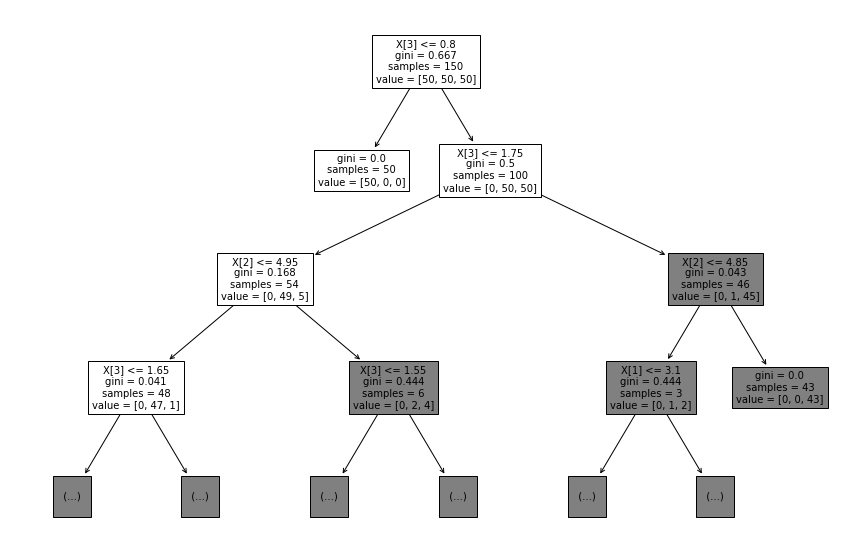

In [25]:
# Split dataset geolink. test_size =0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2020)

clf = tree.DecisionTreeClassifier()
fig, ax = plt.subplots(figsize=(15, 10))
# X0 and y0 from iris_dataset
tree.plot_tree(clf.fit(X0, y0), max_depth=3, fontsize=10)
plt.show()

Now let's train a decision tree (DT) with our geolink dataset. For the next example, we will set the hyperparater max_depth to 100. Notice how the accuracy in the model changes. 

In [26]:
clf = tree.DecisionTreeClassifier(random_state=2020)
clf = clf.fit(X_train, y_train)

# Evaluation Time
y_pred = clf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.6944422078183502


We got an accuracy of 69.44% just with the default hyperparameters. Let's train the DT again with a different hyperparameter.

In [27]:
clf2 = tree.DecisionTreeClassifier(random_state=2020, max_depth=10)
clf2 = clf2.fit(X_train, y_train)

# Evaluation Time
y_pred = clf2.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.5273763033938564


We got now an accuracy of 53% just with the hyperparameter max_depth=10. Let's train the DT again with a different hyperparameter. In appearance, the first model would be better, however, there are other metrics besides accuracy that should be taken into account. There are also other methods to avoid overfitting. We will go deeper into this topic in the next sessions.

#### Exercise
The concept of decision trees is very simple and intuitive and unlike other methods, it does not need normalised data to work properly.
We saw two examples of DT classification. In this exercise, use <code>sklearn.tree.DecisionTreeRegressor</code> to create a regression model from the iris dataset.

Use the parameters <code>species</code>,<code>sepal_width</code>,<code>petal_length</code>,<code>petal_width</code> to predict <code>sepal_length</code>

# 6. Random Forest <a name="random-forest"></a>

> A random forest is a meta estimator that fits several decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.


Random Forest is an ensemble method:
>The goal of ensemble methods is to combine the predictions of several base estimators built with a given learning algorithm to improve generalizability/robustness over a single estimator.

We will learn more about ensemble methods in the next session.

Scikit-learn support Random Forest for classification and regression (<code>RandomForestClassifier</code> and <code>RandomForestRegressor</code>)

> In random forests (see RandomForestClassifier and RandomForestRegressor classes), each tree in the ensemble is built from a sample drawn with replacement (i.e., a bootstrap sample) from the training set. Furthermore, when splitting each node during the construction of a tree, the best split is found either from all input features or a random subset of size max_features. (See the parameter tuning guidelines for more details). 
The purpose of these two sources of randomness is to decrease the variance of the forest estimator. Indeed, individual decision trees typically exhibit high variance and tend to overfit. The injected randomness in forests yields decision trees with somewhat decoupled prediction errors. By taking an average of those predictions, some errors can cancel out. Random forests achieve a reduced variance by combining diverse trees, sometimes at the cost of a slight increase in bias. In practice, the variance reduction is often significant hence yielding an overall better model.

This implementation of RandomForest only accepts numerical values. You should always encode categorical values.

Source: [Official Documentation Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

**Note:** The next 2 pieces of code might take several minutes to complete the training.

In [28]:
clf=RandomForestClassifier()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.801481541124844


Let's train again the model with different hyperparameterds.

In [29]:
clf=RandomForestClassifier(max_depth=100, n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.8018002603432773


# 7. Boosted Trees <a name="boosted-trees"></a>

There are three commonly used boosted tree libraries:
- CatBoost
- Light GBM
- XGBoost

In this session, we will use XGBoost which is available in the environment provided. If you are interested in learning about the other libraries find more information [here](https://towardsdatascience.com/catboost-vs-light-gbm-vs-xgboost-5f93620723db).

More information about Boosted Trees and XGBoost [here](https://xgboost.readthedocs.io/en/latest/tutorials/model.html)

## What is XGBoost?

XGBoost is a popular library to work with tabular data. It has shown its potential in ML competitions, in particular, Kaggle where many competitors have won using this library and fine-tune the models for optimal performance.

Depending on the problem you are trying to solve you can either use <code>XGBClassifier</code> or <code>XGBRegressor</code> from the XGBoost library.

In [30]:
from xgboost import XGBClassifier

XGBoost API is very similar to scikit-learn providing a <code>fit</code> function for the training.

In [31]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [32]:
y_pred= model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.6429573117543648


## References and further reading
The following sources have been used in the creation of this notebook:
- [Decision Trees](https://en.wikipedia.org/wiki/Decision_tree)
- [SVMs](https://nlp.stanford.edu/IR-book/html/htmledition/multiclass-svms-1.html)
- [Normalisation](https://en.wikipedia.org/wiki/Normalization_(statistics))
- [XGBoost documentation](https://xgboost.readthedocs.io/en/latest/)
- [Seaborn Datasets](https://seaborn.pydata.org/generated/seaborn.load_dataset.html)
- [Scikit-learn Datasets](https://scikit-learn.org/stable/datasets/index.html)
